# Steam Project
![title](https://wallpaperaccess.com/full/322057.png)

### Let's kickstart by installing required libraries

In [1]:
#%pip install pandas numpy seaborn matplotlib plotly --quiet --upgrade

#### Getting the oil aka the data

In [2]:
import zipfile
import pandas as pd
import numpy as np

zf = zipfile.ZipFile('./Steam csv/steamcsv.zip')
zf.namelist()[:5]

['steam_data.csv',
 'steam_data_1.csv',
 'steam_data_2.csv',
 'steam_data_3.csv',
 'steam_data_4.csv']

In [3]:
df_to_cat = [pd.read_csv(zf.open(file),on_bad_lines='skip', sep=',') for file in zf.namelist()]
steam_df = pd.concat(df_to_cat,ignore_index=True)

In [4]:
steam_df.head()

,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
0,Steam Deck,NaN,39900.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Steam Deck,NaN,39900.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Steam Deck,NaN,39900.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Sekiro™: Shadows Die Twice - GOTY Edition,Mar 21 2019,2999.0,Game of the Year - The Game Awards 2019 Best A...,Very Positive,"(2,068)",FromSoftware,"Activision (Excluding Japan and Asia), FromSof...","Souls-like,Difficult,Action,Singleplayer,Ninja..."
4,ELDEN RING,Feb 24 2022,5999.0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",Very Positive,"(60,936)",FromSoftware Inc.,"FromSoftware Inc., BANDAI NAMCO Entertainment","Souls-like,Relaxing,Dark Fantasy,RPG,Difficult..."


## Parsing columns 
> - Let's clean 'title_rating' to have only numerics 

In [5]:
#steam_df.title_rating.apply(str.strip,args=(','))

In [6]:
steam_df.title_rating


0             NaN
1             NaN
2             NaN
3         (2,068)
4        (60,936)
           ...   
24833         NaN
24834       (756)
24835       (412)
24836        (23)
24837         NaN
Name: title_rating, Length: 24838, dtype: object

In [7]:
import re
print(help(re.sub))

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.

None


In [8]:
steam_df.loc[steam_df['title_rating'] == '(12,2)','title_rating']

Series([], Name: title_rating, dtype: object)

In [9]:
#removing special chars from 'title_rating'
for i,j in steam_df['title_rating'].iteritems():
    # print(j,i)
    # print(j,type(j))
    re_j = re.sub(r'\D', '', str(j))
    if re_j == '':
        re_j = np.nan
    else:
        steam_df.loc[steam_df['title_rating'] == j, 'title_rating'] = int(re_j) #use loc to modify df or series cos settingcopyvalue warning goess brr
    

In [10]:
steam_df.replace(['NaN','None','- Need more user reviews to generate a score'], np.nan, inplace=True) #replacing all 'NaN' with standard np.nan

In [11]:
steam_df.sample()

,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
17454,Tom Clancy's Rainbow Six® Siege,Dec 1 2015,799.0,Tom Clancy's Rainbow Six Siege is the latest i...,Very Positive,10177.0,Ubisoft Montreal,Ubisoft,"FPS,Hero Shooter,Multiplayer,Tactical,Shooter,..."


In [12]:
steam_df.title_rating.astype('float')

0            NaN
1            NaN
2            NaN
3         2068.0
4        60936.0
          ...   
24833        NaN
24834      756.0
24835      412.0
24836       23.0
24837        NaN
Name: title_rating, Length: 24838, dtype: float64

## Handling & Analyzing Duplicates 

In [13]:
steam_df[steam_df.duplicated()].sample(5)


,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
5200,Planet Zoo: Australia Pack,Aug 25 2020,549.0,NaN,Mostly Positive,164.0,Frontier Developments,Frontier Developments,"Simulation,Strategy,Sandbox,+"
1316,The Jackbox Party Pack 5,Oct 17 2018,2999.0,"It’s the biggest Party Pack yet, including the...",Very Positive,24.0,"Jackbox Games, Inc.","Jackbox Games, Inc.","Casual,Local Multiplayer,Trivia,Comedy,Funny,M..."
5550,Back 4 Blood,Oct 12 2021,2999.0,Back 4 Blood is a thrilling cooperative first-...,Mixed,632.0,Turtle Rock Studios,"Warner Bros. Games, Warner Bros. Interactive E...","Zombies,Online Co-Op,Multiplayer,Action,Shoote..."
22741,Call of Duty®: Black Ops III,Nov 6 2015,5999.0,Call of Duty®: Black Ops III Zombies Chronicle...,Very Positive,1647.0,"Treyarch, Aspyr (Mac)","Activision, Aspyr (Mac)","Multiplayer,FPS,Zombies,Shooter,Action,First-P..."
20557,Cities: Skylines Collection,NaN,24900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
steam_df[steam_df.title_name == 'LEGO® Star Wars™: The Skywalker Saga'][:5]


,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
7,LEGO® Star Wars™: The Skywalker Saga,Apr 5 2022,4999.0,Play through all nine Skywalker saga films in ...,Very Positive,17192.0,TT Games,"Warner Bros. Games, Warner Bros. Interactive E...","LEGO,Adventure,Open World,Multiplayer,Space,Co..."
10,LEGO® Star Wars™: The Skywalker Saga,Apr 5 2022,4999.0,Play through all nine Skywalker saga films in ...,Very Positive,17192.0,TT Games,"Warner Bros. Games, Warner Bros. Interactive E...","LEGO,Adventure,Open World,Multiplayer,Space,Co..."
498,LEGO® Star Wars™: The Skywalker Saga,Apr 5 2022,4999.0,Play through all nine Skywalker saga films in ...,Very Positive,16987.0,TT Games,"Warner Bros. Games, Warner Bros. Interactive E...","LEGO,Adventure,Open World,Multiplayer,Space,Co..."
499,LEGO® Star Wars™: The Skywalker Saga,Apr 5 2022,4999.0,Play through all nine Skywalker saga films in ...,Very Positive,16987.0,TT Games,"Warner Bros. Games, Warner Bros. Interactive E...","LEGO,Adventure,Open World,Multiplayer,Space,Co..."
994,LEGO® Star Wars™: The Skywalker Saga,Apr 5 2022,4999.0,Play through all nine Skywalker saga films in ...,Very Positive,16712.0,TT Games,"Warner Bros. Games, Warner Bros. Interactive E...","LEGO,Adventure,Open World,Multiplayer,Space,Co..."


In [15]:
title_group = steam_df.groupby(by='title_name')

In [16]:
title_group.ngroups


1838

In [17]:
title_group.groups

{'3DMark': [1970, 2956, 4432, 7399, 8313, 8833, 9885, 10896, 11869, 12826, 13367, 13864, 14371, 14763, 15297, 15746, 16203, 16653, 18307, 19832, 20821, 23330, 24837], '7 Days to Die': [74, 554, 1048, 1583, 2066, 2565, 3047, 3551, 4043, 4547, 5047, 5587, 6049, 6559, 7033, 7476, 7979, 8481, 8977, 9457, 9953, 10455, 11000, 11512, 12012, 12518, 13045, 13525, 14006, 14489, 15008, 15516, 15982, 16503, 16969, 17463, 17979, 18513, 18990, 19491, 19981, 20444, 20947, 21442, 21945, 22474, 22963, 23438, 23917, 24409], '9-nine-': [14253], 'A Dance of Fire and Ice': [4729], 'A Game of Thrones: The Board Game - Digital Edition': [6363], 'A Hat in Time': [16258, 16787, 17842, 18239, 18742, 24100, 24613], 'A Hat in Time - Ultimate Edition': [10395, 16391, 18362, 24802], 'A Plague Tale: Innocence': [12896, 14216], 'A Total War Saga: TROY': [10919, 13693, 18875], 'A Way Out': [179, 688, 1201, 1717, 2167, 2626, 3088, 7903, 8318, 10408, 14715, 16261, 16593, 17100, 17593, 18178, 18640, 19095, 19577, 20078, 

In [18]:
groups = {
    'column':[],
    'value count':[]
}
for i in title_group.groups:
    groups['column'].append(i)
    groups['value count'].append(len(title_group.groups[i]))

groups_df = pd.DataFrame(groups)
groups_df.sort_values(by='value count',ascending=False).head(30).style.bar(subset=['value count'])

,column,value count
1294,STAR WARS™: The Old Republic™ - Cartel Coins,300
581,Fallout 76: Atoms,200
1293,STAR WARS™: The Old Republic™ - Subscriptions,199
478,Dying Light 2 Stay Human,125
1400,Steam Deck,122
961,Microsoft Flight Simulator Game of the Year Edition,100
876,LEGO® Star Wars™: The Skywalker Saga,100
573,Fallout 1st,99
233,Call of Duty®: Black Ops III,97
648,GTA V: Megalodon Shark Cash Card,92


In [19]:
title_group.size()

title_name
3DMark                                                 23
7 Days to Die                                          50
9-nine-                                                 1
A Dance of Fire and Ice                                 1
A Game of Thrones: The Board Game - Digital Edition     1
                                                       ..
tERRORbane                                              1
theHunter: Call of the Wild™                           46
theHunter: Call of the Wild™ - Diamond Bundle           3
theHunter: Call of the Wild™ - Modern Rifle Pack        2
theHunter: Call of the Wild™- Complete Collection      10
Length: 1838, dtype: int64

In [20]:
pd.DataFrame.first?

Signature: pd.DataFrame.first(self: 'NDFrameT', offset) -> 'NDFrameT'
Docstring:
Select initial periods of time series data based on a date offset.

When having a DataFrame with dates as index, this function can
select the first few rows based on a date offset.

Parameters
----------
offset : str, DateOffset or dateutil.relativedelta
    The offset length of the data that will be selected. For instance,
    '1M' will display all the rows having their index within the first month.

Returns
-------
Series or DataFrame
    A subset of the caller.

Raises
------
TypeError
    If the index is not  a :class:`DatetimeIndex`

See Also
--------
last : Select final periods of time series based on a date offset.
at_time : Select values at a particular time of the day.
between_time : Select values between particular times of the day.

Examples
--------
>>> i = pd.date_range('2018-04-09', periods=4, freq='2D')
>>> ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
>>> ts
            A
2018-04-09  1
20

In [21]:
title_group.first()

,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
title_name,,,,,,,,
3DMark,Feb 12 2013,2999.0,None,None,NaN,None,None,None
7 Days to Die,Dec 13 2013,2499.0,7 Days to Die is an open-world game that is a ...,Very Positive,2960.0,The Fun Pimps,The Fun Pimps Entertainment LLC,"Survival,Zombies,Voxel,Open World,Open World S..."
9-nine-,None,4316.0,None,None,NaN,None,None,None
A Dance of Fire and Ice,Jan 24 2019,599.0,A Dance of Fire and Ice is a strict rhythm gam...,Very Positive,1152.0,7th Beat Games,"7th Beat Games, indienova","Rhythm,Music,Indie,Difficult,Great Soundtrack,..."
A Game of Thrones: The Board Game - Digital Edition,Oct 6 2020,999.0,A Game of Thrones: The Board Game – Digital Ed...,Mixed,12.0,Dire Wolf,Asmodee Digital,"Strategy,Board Game,Tabletop,Multiplayer,Local..."
...,...,...,...,...,...,...,...,...
tERRORbane,Apr 1 2022,1599.0,tERRORbane is a comedic adventure where bugs a...,Positive,18.0,BitNine Studio,WhisperGames,"Multiple Endings,Adventure,Singleplayer,Choose..."
theHunter: Call of the Wild™,Feb 16 2017,1999.0,Experience an atmospheric hunting game like no...,Very Positive,1636.0,Expansive Worlds,Expansive Worlds,"Hunting,Open World,Multiplayer,Simulation,Firs..."
theHunter: Call of the Wild™ - Diamond Bundle,None,2560.0,None,None,NaN,None,None,None


In [22]:
title_group.last()


,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
title_name,,,,,,,,
3DMark,Feb 12 2013,2999.0,None,None,NaN,None,None,None
7 Days to Die,Dec 13 2013,2499.0,7 Days to Die is an open-world game that is a ...,Very Positive,2866.0,The Fun Pimps,The Fun Pimps Entertainment LLC,"Survival,Zombies,Voxel,Open World,Open World S..."
9-nine-,None,4316.0,None,None,NaN,None,None,None
A Dance of Fire and Ice,Jan 24 2019,599.0,A Dance of Fire and Ice is a strict rhythm gam...,Very Positive,1152.0,7th Beat Games,"7th Beat Games, indienova","Rhythm,Music,Indie,Difficult,Great Soundtrack,..."
A Game of Thrones: The Board Game - Digital Edition,Oct 6 2020,999.0,A Game of Thrones: The Board Game – Digital Ed...,Mixed,12.0,Dire Wolf,Asmodee Digital,"Strategy,Board Game,Tabletop,Multiplayer,Local..."
...,...,...,...,...,...,...,...,...
tERRORbane,Apr 1 2022,1599.0,tERRORbane is a comedic adventure where bugs a...,Positive,18.0,BitNine Studio,WhisperGames,"Multiple Endings,Adventure,Singleplayer,Choose..."
theHunter: Call of the Wild™,Feb 16 2017,1999.0,Experience an atmospheric hunting game like no...,Very Positive,2278.0,Expansive Worlds,Expansive Worlds,"Hunting,Open World,Multiplayer,Simulation,Firs..."
theHunter: Call of the Wild™ - Diamond Bundle,None,2560.0,None,None,NaN,None,None,None


In [23]:
title_group.price.max()

title_name
3DMark                                                  2999.0
7 Days to Die                                           2499.0
9-nine-                                                 4316.0
A Dance of Fire and Ice                                  599.0
A Game of Thrones: The Board Game - Digital Edition      999.0
                                                        ...   
tERRORbane                                              1599.0
theHunter: Call of the Wild™                            1999.0
theHunter: Call of the Wild™ - Diamond Bundle           2560.0
theHunter: Call of the Wild™ - Modern Rifle Pack         399.0
theHunter: Call of the Wild™- Complete Collection      11372.0
Name: price, Length: 1838, dtype: float64

In [24]:
title_group.price.agg(['max', 'min', 'count', 'median', 'mean']) # aggregation based on 'price'


,max,min,count,median,mean
title_name,,,,,
3DMark,2999.0,1199.0,23,2999.0,2607.695652
7 Days to Die,2499.0,749.0,50,2499.0,2254.000000
9-nine-,4316.0,4316.0,1,4316.0,4316.000000
A Dance of Fire and Ice,599.0,599.0,1,599.0,599.000000
A Game of Thrones: The Board Game - Digital Edition,999.0,999.0,1,999.0,999.000000
...,...,...,...,...,...
tERRORbane,1599.0,1599.0,1,1599.0,1599.000000
theHunter: Call of the Wild™,1999.0,699.0,46,1999.0,1801.173913
theHunter: Call of the Wild™ - Diamond Bundle,2560.0,2560.0,3,2560.0,2560.000000


In [25]:
#using custom function to perform grouping
def categorize(x):
    return x.mean() if x.mean()<1000 else False

In [26]:
# price_categorize being set as column name & categorize is func hence not passed in quotes
title_group.price.agg(price_categorize=(categorize))


,price_categorize
title_name,
3DMark,False
7 Days to Die,False
9-nine-,False
A Dance of Fire and Ice,599.0
A Game of Thrones: The Board Game - Digital Edition,999.0
...,...
tERRORbane,False
theHunter: Call of the Wild™,False
theHunter: Call of the Wild™ - Diamond Bundle,False


In [27]:
title_group.mean() #aggregates all numeric columns

,price,title_rating
title_name,,
3DMark,2607.695652,NaN
7 Days to Die,2254.000000,2322.060000
9-nine-,4316.000000,NaN
A Dance of Fire and Ice,599.000000,1152.000000
A Game of Thrones: The Board Game - Digital Edition,999.000000,12.000000
...,...,...
tERRORbane,1599.000000,18.000000
theHunter: Call of the Wild™,1801.173913,1741.413043
theHunter: Call of the Wild™ - Diamond Bundle,2560.000000,NaN


In [28]:
title_group.price.agg(['count','median']) #more than one aggregations

,count,median
title_name,,
3DMark,23,2999.0
7 Days to Die,50,2499.0
9-nine-,1,4316.0
A Dance of Fire and Ice,1,599.0
A Game of Thrones: The Board Game - Digital Edition,1,999.0
...,...,...
tERRORbane,1,1599.0
theHunter: Call of the Wild™,46,1999.0
theHunter: Call of the Wild™ - Diamond Bundle,3,2560.0


In [29]:
standarization = lambda x: (x-x.mean())/x.std() 
title_group.price.transform(standarization)

0             NaN
1             NaN
2             NaN
3       -7.001400
4             NaN
           ...   
24833         NaN
24834    0.556304
24835    1.044466
24836         NaN
24837    0.515461
Name: price, Length: 24838, dtype: float64

In [30]:
title_group.price.apply(standarization)

0             NaN
1             NaN
2             NaN
3       -7.001400
4             NaN
           ...   
24833         NaN
24834    0.556304
24835    1.044466
24836         NaN
24837    0.515461
Name: price, Length: 24838, dtype: float64

In [31]:
#title_group.filter(lambda x: len(x) > 10) # x is all grouped titles


In [32]:
title_group.get_group('STAR WARS™: The Old Republic™ - Cartel Coins')


,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
59,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
60,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
61,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
62,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
63,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
...,...,...,...,...,...,...,...,...,...
24372,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
24373,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
24374,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"
24375,STAR WARS™: The Old Republic™ - Cartel Coins,Jul 21 2020,299.0,NaN,['No user reviews'],0.0,BioWare,Electronic Arts,"Massively Multiplayer,MMORPG,+"


In [33]:
import matplotlib.pyplot as plt


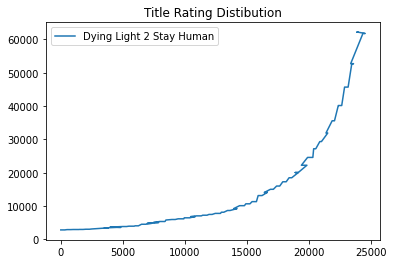

In [34]:
interest_df = title_group.get_group('Ghostwire: Tokyo')
interest_df = interest_df[interest_df.title_rating != 0]
interest_2_df = title_group.get_group('Dying Light 2 Stay Human')

#plt.plot(interest_df.sort_values(by='title_rating').title_rating,);
plt.plot(interest_2_df.sort_values(by='title_rating').title_rating,);
plt.title('Title Rating Distibution')
plt.legend(['Dying Light 2 Stay Human'])


In [35]:
steam_df.groupby(by=['title_name','title_rating']).mean()

price
title_name                                       title_rating        
7 Days to Die                                    1859.0         749.0
                                                 1872.0        2499.0
                                                 1874.0         749.0
                                                 1876.0         749.0
                                                 1878.0        2499.0
...                                                               ...
theHunter: Call of the Wild™                     2187.0        1999.0
                                                 2241.0        1999.0
                                                 2278.0        1999.0
theHunter: Call of the Wild™ - Modern Rifle Pack 40.0           399.0
                                                 239.0          399.0

[15349 rows x 1 columns]

In [36]:
steam_df.groupby(by=['title_name','title_rating']).mean().reset_index()

,title_name,title_rating,price
0,7 Days to Die,1859.0,749.0
1,7 Days to Die,1872.0,2499.0
2,7 Days to Die,1874.0,749.0
3,7 Days to Die,1876.0,749.0
4,7 Days to Die,1878.0,2499.0
...,...,...,...
15344,theHunter: Call of the Wild™,2187.0,1999.0
15345,theHunter: Call of the Wild™,2241.0,1999.0
15346,theHunter: Call of the Wild™,2278.0,1999.0
15347,theHunter: Call of the Wild™ - Modern Rifle Pack,40.0,399.0


In [37]:
steam_df.groupby(by=['title_name','title_rating'],as_index=False).mean()

,title_name,title_rating,price
0,7 Days to Die,1859.0,749.0
1,7 Days to Die,1872.0,2499.0
2,7 Days to Die,1874.0,749.0
3,7 Days to Die,1876.0,749.0
4,7 Days to Die,1878.0,2499.0
...,...,...,...
15344,theHunter: Call of the Wild™,2187.0,1999.0
15345,theHunter: Call of the Wild™,2241.0,1999.0
15346,theHunter: Call of the Wild™,2278.0,1999.0
15347,theHunter: Call of the Wild™ - Modern Rifle Pack,40.0,399.0


In [38]:
steam_df.groupby(by=['title_name','title_rating'],dropna=False).mean()

price
title_name                                        title_rating             
3DMark                                            NaN           2607.695652
7 Days to Die                                     1859.0         749.000000
                                                  1872.0        2499.000000
                                                  1874.0         749.000000
                                                  1876.0         749.000000
...                                                                     ...
theHunter: Call of the Wild™                      2278.0        1999.000000
theHunter: Call of the Wild™ - Diamond Bundle     NaN           2560.000000
theHunter: Call of the Wild™ - Modern Rifle Pack  40.0           399.000000
                                                  239.0          399.000000
theHunter: Call of the Wild™- Complete Collection NaN           7418.400000

[15865 rows x 1 columns]

In [39]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24838 entries, 0 to 24837
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_name     24838 non-null  object 
 1   realease_date  21499 non-null  object 
 2   price          24838 non-null  float64
 3   description    16053 non-null  object 
 4   title_review   20253 non-null  object 
 5   title_rating   20151 non-null  float64
 6   developer      20253 non-null  object 
 7   publisher      20253 non-null  object 
 8   game_tags      20253 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


In [40]:
steam_df.nunique()

title_name       1838
realease_date     850
price             629
description      1101
title_review       18
title_rating     4461
developer         922
publisher         654
game_tags        2500
dtype: int64

- Hmmm I scrapped all of this data daily and topsellers may not change daily, some may remain grossing for days,weeks and some for even months,hence this many dupilicates, let's try to remove these multiple records

In [41]:
steam_df.drop_duplicates(inplace=True) 

In [42]:
steam_df.isnull().sum()*100 / len(steam_df)


title_name        0.000000
realease_date     3.124253
price             0.000000
description      14.623656
title_review      3.900836
title_rating      4.426523
developer         3.900836
publisher         3.900836
game_tags         3.900836
dtype: float64

In [43]:
steam_df.sample(2)

,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
9910,"Papers, Please",Aug 8 2013,999.0,Congratulations. The October labor lottery is ...,Overwhelmingly Positive,514.0,Lucas Pope,3909,"Indie,Political,Simulation,Singleplayer,Point ..."
23944,Microsoft Flight Simulator Game of the Year Ed...,Apr 18 2020,5999.0,Thank you to our fans – new and old! Microsoft...,Mostly Positive,873.0,Asobo Studio,Xbox Game Studios,"Simulation,Flight,Open World,Realistic,Multipl..."


In [44]:
len(steam_df.loc[steam_df.realease_date == 'Oct 1 2019'])

24

- Huh weird right, that's because by default all columns were used to identify uniques rows, let's use more relevent column like 'title_name' to identify unique rows in our case

In [45]:
steam_df.drop_duplicates(subset='title_name',inplace=True) #using 'title_name' to identify duplicates

In [46]:
steam_df.loc[steam_df.realease_date == 'Oct 1 2019']


,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags
436,Destiny 2: Shadowkeep,Oct 1 2019,2499.0,NaN,Mostly Negative,52.0,Bungie,Bungie,"Adventure,Action,Looter Shooter,FPS,First-Pers..."


In [47]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838 entries, 0 to 24836
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_name     1838 non-null   object 
 1   realease_date  1487 non-null   object 
 2   price          1838 non-null   float64
 3   description    1089 non-null   object 
 4   title_review   1386 non-null   object 
 5   title_rating   1355 non-null   float64
 6   developer      1386 non-null   object 
 7   publisher      1386 non-null   object 
 8   game_tags      1386 non-null   object 
dtypes: float64(2), object(7)
memory usage: 143.6+ KB


In [48]:
steam_df.dropna(inplace=True)

In [49]:
steam_df.isna().sum()

title_name       0
realease_date    0
price            0
description      0
title_review     0
title_rating     0
developer        0
publisher        0
game_tags        0
dtype: int64

In [50]:
steam_df.shape

(1073, 9)

- Ummm.....
 from 24k+ rows of data to 1k+....let's analyize this quickly before this goes away!

## Splitting Dates

In [51]:
steam_df.sample(5).realease_date

20317    Oct 27 2017
4215     Jan 26 2018
19106    Aug 13 2021
154       Sep 9 2021
313      Nov 12 2009
Name: realease_date, dtype: object

In [52]:
test_date = steam_df.sample(5).realease_date.iloc[0]


In [53]:
test_date

'Feb 26 2016'

In [54]:
type(test_date)

str

In [55]:
import datetime

In [56]:
new_date = datetime.datetime.strptime(test_date,"%b %d %Y")

In [57]:
print(new_date.weekday())
print(new_date.year)
print(new_date.month)
print(new_date.day)


4
2016
2
26


In [58]:
def parse_date(date):
    try:
        date = datetime.datetime.strptime(date,'%b %d %Y').date()
    except:
        pass
    return date

In [59]:
steam_df['release_date'] = steam_df['realease_date'].apply(parse_date)

In [60]:
steam_df['release_date']

3        2019-03-21
4        2022-02-24
6        2022-04-25
7        2022-04-05
8        2020-12-09
            ...    
24531    2022-03-01
24651    2020-10-22
24727    2015-10-13
24786    2021-08-28
24836    2021-09-02
Name: release_date, Length: 1073, dtype: object

In [61]:
type(steam_df['release_date'].sample().iloc[0])

datetime.date

In [62]:
#dropping badly formated date rows
for i,r in steam_df.iterrows():
    if not isinstance(r['release_date'], datetime.date):
        #print(type(r))
        #print(r['release_date'])
        steam_df.drop(index=i,inplace=True)

In [63]:
def split_date(date_column):
    # x in lambda is a datetime object
    steam_df['Day'] = steam_df[date_column].apply(lambda x: x.day)
    steam_df['Month'] = steam_df[date_column].apply(lambda x: x.month)
    steam_df['Year'] = steam_df[date_column].apply(lambda x: x.year)
    # return steam_df

In [64]:
#steam_df.apply(lambda x:split_date('release_date'))

In [65]:
# x in lambda is a datetime object
steam_df['Day'] = steam_df['release_date'].apply(lambda x: x.day)
steam_df['Month'] = steam_df['release_date'].apply(lambda x:x.strftime('%B'))
steam_df['Year'] = steam_df['release_date'].apply(lambda x: x.year)

In [66]:
steam_df.sample(2)

,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags,release_date,Day,Month,Year
478,ANNO: Mutationem,Mar 17 2022,1874.0,ANNO: Mutationem is an action-adventure game w...,Mostly Positive,426.0,ThinkingStars,Lightning Games,"RPG,Pixel Graphics,Cyberpunk,Female Protagonis...",2022-03-17,17,March,2022
1473,Nightmare Reaper,Mar 28 2022,2499.0,Progress through the cursed depths of a nightm...,Very Positive,691.0,Blazing Bit Games,Blazing Bit Games,"FPS,Looter Shooter,Retro,Violent,Roguelite,Sho...",2022-03-28,28,March,2022


In [67]:
print(steam_df['release_date'].iloc[0])

2019-03-21


## Visualizations

In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [69]:
import plotly.express as px

In [70]:
fig = px.line(steam_df['price'],y='price',x=steam_df['title_name'],hover_name=steam_df.title_name,title='Distribution of Game Prices')
fig.show()

In [71]:
fig.update_layout(
    title='Game Prices Distribution',
    xaxis_title = 'Value',
    yaxis_title = 'Price',
    legend_title = 'Number',
    plot_bgcolor='rgb(0, 0, 0)',
    font=dict(
        family="monospace",
        size=14,
        color="rgb(0, 0, 0)"
    )
)
fig.update_yaxes(rangemode='tozero')


In [72]:
steam_df['game_tags'][3]

'Souls-like,Difficult,Action,Singleplayer,Ninja,Stealth,Adventure,Third Person,Open World,Story Rich,Atmospheric,Violent,Assassin,Dark Fantasy,Hack and Slash,Great Soundtrack,RPG,Gore,Dark,Rhythm,+'

In [73]:
horror_df = steam_df['game_tags'].apply(lambda x:'Horror' in x)

In [74]:
horror_df = steam_df[horror_df]
horror_df.sample()

,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags,release_date,Day,Month,Year
451,Outer Wilds,Jun 18 2020,2499.0,"Named Game of the Year 2019 by Giant Bomb, Pol...",Overwhelmingly Positive,803.0,Mobius Digital,Annapurna Interactive,"Exploration,Space,Mystery,Adventure,Story Rich...",2020-06-18,18,June,2020


In [75]:
fig = px.bar(data_frame=horror_df, x='title_review', y='price',
             title='Horror Game Reviews',
             color_discrete_sequence=["turquoise"],
            # continuous_colorscale=px.colors.qualitative.Antique,
             hover_name='title_name')

fig.update_layout(
    yaxis_title='Price',
    xaxis_title='Review'
)


In [76]:
steam_df['World'] = 'Game'
fig = px.treemap(steam_df,
    path=['World','publisher','developer','Year'],
    values='price',
    color_continuous_scale='RdBu',
    title='Treemap'
    )

fig.show()
    

In [77]:
fig = px.sunburst(steam_df,
    path=['World','developer','publisher'],
    values='price',
    color_continuous_scale='RdBu',
    title='Sunburst',
    width=1000,
    height=1000
    )
fig.update_layout(
    
)
fig.show()

In [78]:
px.scatter(steam_df,
            y='price',
            x='title_rating',
            color='title_review',
            size='price',
            hover_name='title_name',
            range_x=[200,500],
            range_y=[400,5000]
            
)

In [79]:
px.histogram(
    steam_df,
    x='price',
    color='Year',
    hover_data=steam_df.columns,
    range_x=[0,10000],
    marginal='rug', #box,violin

)

In [80]:
pd.options.plotting.backend = 'plotly'

In [81]:
steam_df.plot('price',kind='box',color='Month')


In [82]:
list(steam_df['game_tags'].unique())[:10]

['Souls-like,Difficult,Action,Singleplayer,Ninja,Stealth,Adventure,Third Person,Open World,Story Rich,Atmospheric,Violent,Assassin,Dark Fantasy,Hack and Slash,Great Soundtrack,RPG,Gore,Dark,Rhythm,+',
 'Souls-like,Relaxing,Dark Fantasy,RPG,Difficult,Action RPG,Open World,Third Person,Fantasy,Multiplayer,Online Co-Op,Singleplayer,Action,Co-op,PvP,Violent,3D,Atmospheric,Great Soundtrack,Walking Simulator,+',
 'Deckbuilding,Pinball,Roguelite,Perma Death,Turn-Based,Roguelike,Cute,Strategy,Replay Value,2D,RPG,Turn-Based Combat,Pixel Graphics,Physics,Fantasy,Retro,Singleplayer,Early Access,Indie,Casual,+',
 'LEGO,Adventure,Open World,Multiplayer,Space,Co-op,Action,Sci-fi,Singleplayer,Funny,Local Co-Op,Third Person,Family Friendly,Story Rich,Epic,Great Soundtrack,Memes,Psychological Horror,Beautiful,Puzzle,+',
 'Cyberpunk,Open World,RPG,Sci-fi,Futuristic,Singleplayer,Nudity,FPS,First-Person,Atmospheric,Story Rich,Exploration,Mature,Action,Violent,Great Soundtrack,Action RPG,Adventure,Characte

In [83]:
def gametag_df(tag: str, column: str = 'game_tags') -> pd.DataFrame:
   steam_df.loc[steam_df.game_tags.str.contains(tag),'World'] = tag

In [84]:
#steam_df.loc[steam_df.game_tags.str.contains('Horror'),'World'] = 'Horror'


In [85]:
#steam_df.style.set_sticky(axis="index")


In [86]:
steam_df.loc[steam_df.game_tags.str.contains('Horror')].sample()


,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags,release_date,Day,Month,Year,World
15364,Plants vs. Zombies: Battle for Neighborville™,Jun 4 2020,799.0,Kick some grass in Plants vs. Zombies: Battle ...,Mostly Positive,399.0,PopCap,Electronic Arts,"Third-Person Shooter,Multiplayer,Hero Shooter,...",2020-06-04,4,June,2020,Game


In [87]:
create_tag = ['Multiplayer','Souls-like','Singleplayer','Fantasy','Adventure','Indie','Atmospheric','Space','Open World','Sandbox']
for i in create_tag:
    gametag_df(i)

In [88]:
steam_df.World.unique()

array(['Open World', 'Indie', 'Atmospheric', 'Sandbox', 'Singleplayer',
       'Adventure', 'Fantasy', 'Space', 'Multiplayer', 'Game'],
      dtype=object)

In [89]:
px.pie(steam_df,names='World',values='price',title='Game Types')

In [90]:
steam_df.sort_values(by='price').plot(x='World',y='price',kind='bar')

In [91]:
steam_df.sort_values(by=['price', 'World']).plot(
    y='price', x='World', kind='area',)


In [92]:
steam_df.sample()

,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags,release_date,Day,Month,Year,World
4162,War for the Overworld,Apr 2 2015,449.0,Tired of invading dungeons? It's time you buil...,Very Positive,49.0,Brightrock Games,Brightrock Games,"Strategy,RTS,God Game,Management,Base Building...",2015-04-02,2,April,2015,Sandbox


In [93]:
steam_df.groupby(by=['Year','Month'],as_index=False).count()

,Year,Month,title_name,realease_date,price,description,title_review,title_rating,developer,publisher,game_tags,release_date,Day,World
0,2006,August,1,1,1,1,1,1,1,1,1,1,1,1
1,2006,November,1,1,1,1,1,1,1,1,1,1,1,1
2,2006,October,1,1,1,1,1,1,1,1,1,1,1,1
3,2007,July,1,1,1,1,1,1,1,1,1,1,1,1
4,2007,March,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2022,July,1,1,1,1,1,1,1,1,1,1,1,1
151,2022,June,2,2,2,2,2,2,2,2,2,2,2,2
152,2022,March,87,87,87,87,87,87,87,87,87,87,87,87
153,2022,May,1,1,1,1,1,1,1,1,1,1,1,1


In [94]:
pd.DataFrame.sort_index?

Signature:
pd.DataFrame.sort_index(
    self,
    axis: 'Axis' = 0,
    level: 'Level | None' = None,
    ascending: 'bool | int | Sequence[bool | int]' = True,
    inplace: 'bool' = False,
    kind: 'str' = 'quicksort',
    na_position: 'str' = 'last',
    sort_remaining: 'bool' = True,
    ignore_index: 'bool' = False,
    key: 'IndexKeyFunc' = None,
)
Docstring:
Sort object by labels (along an axis).

Returns a new DataFrame sorted by label if `inplace` argument is
``False``, otherwise updates the original DataFrame and returns None.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The axis along which to sort.  The value 0 identifies the rows,
    and 1 identifies the columns.
level : int or level name or list of ints or list of level names
    If not None, sort on values in specified index level(s).
ascending : bool or list-like of bools, default True
    Sort ascending vs. descending. When the index is a MultiIndex the
    sort direction can be controll

In [95]:
pd.pivot_table(steam_df, values='price', index=['Year'], aggfunc='count',columns='Month').dropna()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2014,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,3.0,2.0
2016,8.0,8.0,2.0,10.0,5.0,6.0,2.0,5.0,6.0,5.0,7.0,3.0
2017,6.0,11.0,5.0,5.0,4.0,5.0,3.0,9.0,5.0,5.0,5.0,7.0
2018,10.0,10.0,10.0,10.0,2.0,2.0,7.0,9.0,8.0,8.0,10.0,4.0
2019,4.0,3.0,9.0,7.0,8.0,5.0,8.0,12.0,11.0,7.0,6.0,18.0
2020,15.0,17.0,14.0,7.0,5.0,6.0,25.0,12.0,8.0,6.0,27.0,19.0
2021,13.0,21.0,30.0,9.0,12.0,24.0,22.0,14.0,19.0,26.0,34.0,37.0


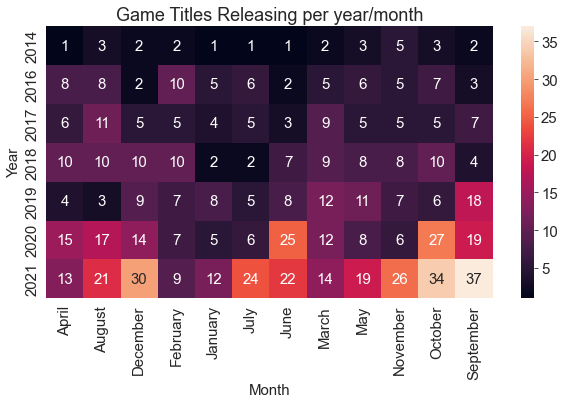

In [96]:
sns.heatmap(pd.pivot_table(steam_df, values='price', index=['Year'], aggfunc='count',columns='Month').dropna(),annot=True,);
plt.title('Game Titles Releasing per year/month');

In [97]:
steam_df['Month'].unique()


array(['March', 'February', 'April', 'December', 'October', 'June',
       'September', 'November', 'August', 'May', 'July', 'January'],
      dtype=object)

In [98]:
steam_df.groupby('Month').price.max()

Month
April         5999.0
August        7999.0
December      6999.0
February      5999.0
January       5999.0
July          5999.0
June          6999.0
March         9999.0
May           5999.0
November     14999.0
October       6999.0
September     5999.0
Name: price, dtype: float64

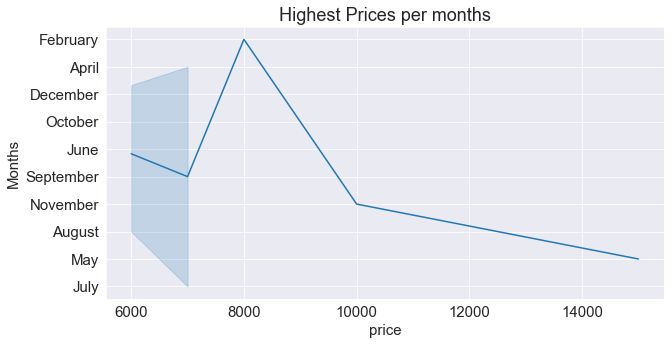

In [99]:
sns.lineplot(y=steam_df['Month'].unique(),x=steam_df.groupby('Month').price.max())
plt.ylabel('Months')
plt.title('Highest Prices per months');

In [100]:
%pip install wordcloud --quiet

Note: you may need to restart the kernel to use updated packages.


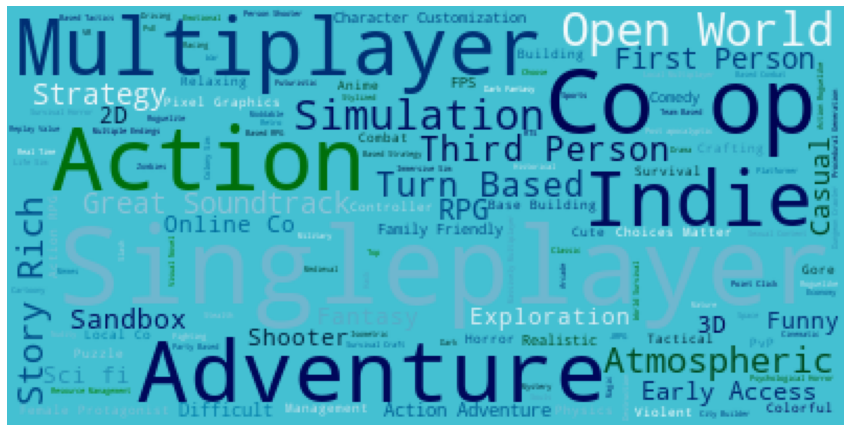

In [101]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='#44C0D2', colormap="ocean",  random_state=10).generate(str(list(steam_df.game_tags)))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cloud);

## Key Takeaways
> - Multiplayer, Open world, Action, Adventure, Atmospheric, Single Player, Story Rich, Sandbox, Indie types of games are very poplular.
> - Games prices mostly vary between 1k to 3.5k.
> - There is relationship between price & it's popularity( rating ).
> - More games were released for the year 2021 & 2022.
> - Sandbox & open world games are costly( may be due the complicated development)
> - Electronic Arts, SEGA, Square Enix, Ubisoft, Xbox Games Studios, Activison, BANDAI NAMCO Entertainment,  Bethasda Softworks released most game titles.

## Future Work
> - Use techniques to better handle missing or duplicate data
> - Feature Engineering to build usefull features
> - Gather more metrics to better understand data
> - Parse & handle huge or big data.